In this program, we load both our XSPEC/Fakeit and BXA fit parameters and compare the parameter distributions found by both. 

In [3]:
from __future__ import division
import os
import numpy as np
import pandas as pd
from collections import OrderedDict
from astropy.io import fits as pyfits
import json

In [4]:
burst        = 'bn080916009'
modName      = 'grbm'
version      = '-01-'
det          = 'L'
detdir       = ('GBMwLAT' if 'L' in det else 'GBM')

# XSPEC FAKEIT 

In [31]:
data_dir = "/Users/KimiZ/GRBs2/analysis/LAT/%s/integrated/"%burst
mod_dir  = "/Users/KimiZ/GRBs2/analysis/LAT/%s/PYXSPEC/%s/%s/"%(burst, detdir, modName)

# FAKEIT FIT RESULTS
filename = os.path.join(mod_dir, "fakeit_fitresults_%s_%s_%s_.fit"%(modName, version, det))
f    = pyfits.open(filename)
dfX = pd.DataFrame(f[1].data)
dfX = dfX.astype(float)
dfX = dfX.loc[:, 'PARAM1':'PARAM4']
dfX.columns = ['alpha__1', 'beta__2', 'tem__3', 'norm__4']


# BXA

In [30]:
dfB.columns.tolist()

['alpha__1', 'beta__2', 'tem__3', 'norm__4', 'FIT_STATISTIC']

In [33]:
data_dir = "/Users/KimiZ/GRBs2/analysis/LAT/%s/integrated/"%burst
mod_dir = "/Users/KimiZ/GRBs2/analysis/LAT/%s/BXA/%s/%s/"%(burst, detdir, modName)
# BXA FIT RESUTLS
filename = os.path.join(mod_dir, "%s_%s_%s_chain.fits"%(modName, version, det))
f          = pyfits.open(filename)
dfB = pd.DataFrame(f[1].data)
dfB = dfB.astype(float)
dfB = dfB.loc[:, 'alpha__1':'norm__4']

---

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
?plt.hist

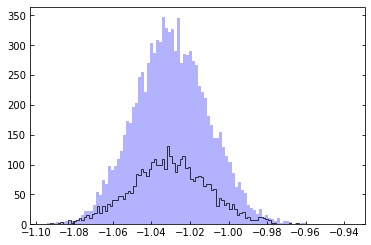

In [45]:
plt.hist(dfX.alpha__1, bins=100, histtype='stepfilled', color='blue', alpha=0.3, label='XSPEC/Fakeit')
plt.hist(dfB.alpha__1, bins=100, histtype='step', color='k', alpha=0.75, label='BXA')
plt.show()

These don't match up because there is a drastically different number of rows. 

In [48]:
dfX.shape, dfB.shape

((10000, 4), (3966, 4))

normalize the histograms

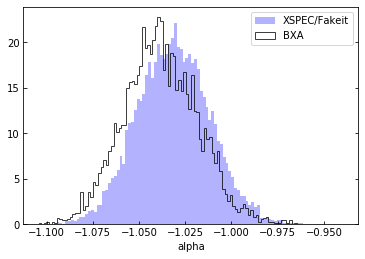

In [60]:
plt.hist(dfX.alpha__1, bins=100, histtype='stepfilled', normed=True,
         color='blue', 
         alpha=0.3, 
         label='XSPEC/Fakeit')
plt.hist(dfB.alpha__1, bins=100, histtype='step', normed=True,
         color='k', 
         alpha=0.75, 
         label='BXA')
plt.xlabel('alpha')
plt.legend(loc='best', numpoints=1)
plt.show()

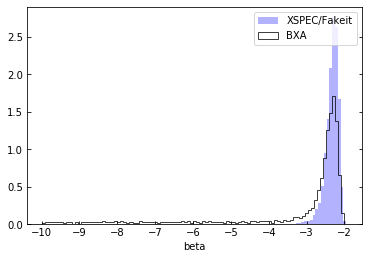

In [61]:
plt.hist(dfX.beta__2, bins=100, histtype='stepfilled', normed=True,
         color='blue', 
         alpha=0.3, 
         label='XSPEC/Fakeit')

plt.hist(dfB.beta__2, bins=100, histtype='step', normed=True,
         color='k', 
         alpha=0.75, 
         label='BXA')
plt.xlabel('beta')
plt.legend(loc='best', numpoints=1)
plt.show()

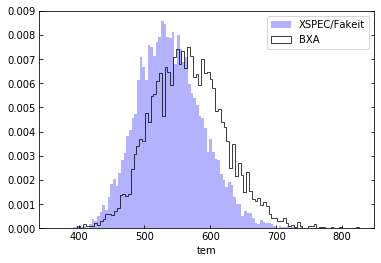

In [62]:
plt.hist(dfX.tem__3, bins=100, histtype='stepfilled', normed=True,
         color='blue', 
         alpha=0.3, 
         label='XSPEC/Fakeit')
plt.hist(dfB.tem__3, bins=100, histtype='step', normed=True,
         color='k', 
         alpha=0.75, 
         label='BXA')
plt.xlabel('tem')
plt.legend(loc='best', numpoints=1)
plt.show()

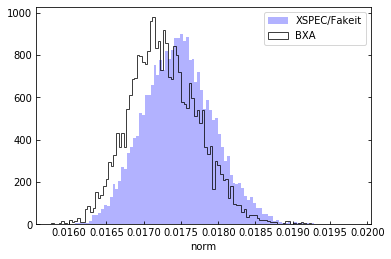

In [63]:
plt.hist(dfX.norm__4, bins=100, histtype='stepfilled', normed=True,
         color='blue', 
         alpha=0.3, 
         label='XSPEC/Fakeit')
plt.hist(dfB.norm__4, bins=100, histtype='step', normed=True,
         color='k', 
         alpha=0.75, 
         label='BXA')
plt.xlabel('norm')
plt.legend(loc='best', numpoints=1)
plt.show()

---

# Lets take a look at these same plots, but for the GBM data analysis only.  

In [54]:
burst        = 'bn080916009'
modName      = 'grbm'
version      = '-01-'
det          = 'G'
detdir       = ('GBMwLAT' if 'L' in det else 'GBM')

data_dir = "/Users/KimiZ/GRBs2/analysis/LAT/%s/integrated/"%burst
mod_dir  = "/Users/KimiZ/GRBs2/analysis/LAT/%s/PYXSPEC/%s/%s/"%(burst, detdir, modName)

# FAKEIT FIT RESULTS
filename = os.path.join(mod_dir, "fakeit_fitresults_%s_%s_%s_.fit"%(modName, version, det))
f    = pyfits.open(filename)
dfX = pd.DataFrame(f[1].data)
dfX = dfX.astype(float)
dfX = dfX.loc[:, 'PARAM1':'PARAM4']
dfX.columns = ['alpha__1', 'beta__2', 'tem__3', 'norm__4']


# BXA

dfB.columns.tolist()

data_dir = "/Users/KimiZ/GRBs2/analysis/LAT/%s/integrated/"%burst
mod_dir = "/Users/KimiZ/GRBs2/analysis/LAT/%s/BXA/%s/%s/"%(burst, detdir, modName)
# BXA FIT RESUTLS
filename = os.path.join(mod_dir, "%s_%s_%s_chain.fits"%(modName, version, det))
f          = pyfits.open(filename)
dfB = pd.DataFrame(f[1].data)
dfB = dfB.astype(float)
dfB = dfB.loc[:, 'alpha__1':'norm__4']

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

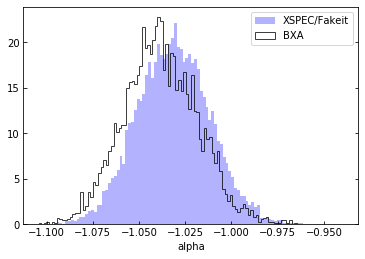

In [64]:
plt.hist(dfX.alpha__1, bins=100, histtype='stepfilled', normed=True,
         color='blue', 
         alpha=0.3, 
         label='XSPEC/Fakeit')
plt.hist(dfB.alpha__1, bins=100, histtype='step', normed=True,
         color='k', 
         alpha=0.75, 
         label='BXA')
plt.xlabel('alpha')
plt.legend(loc='best', numpoints=1)
plt.show()

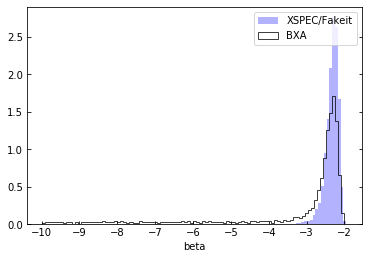

In [65]:
plt.hist(dfX.beta__2, bins=100, histtype='stepfilled', normed=True,
         color='blue', 
         alpha=0.3, 
         label='XSPEC/Fakeit')

plt.hist(dfB.beta__2, bins=100, histtype='step', normed=True,
         color='k', 
         alpha=0.75, 
         label='BXA')
plt.xlabel('beta')
plt.legend(loc='best', numpoints=1)
plt.show()

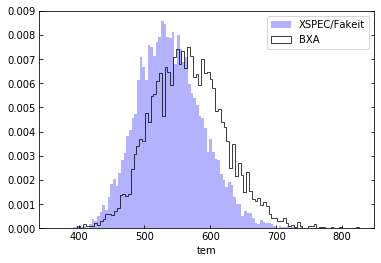

In [66]:
plt.hist(dfX.tem__3, bins=100, histtype='stepfilled', normed=True,
         color='blue', 
         alpha=0.3, 
         label='XSPEC/Fakeit')
plt.hist(dfB.tem__3, bins=100, histtype='step', normed=True,
         color='k', 
         alpha=0.75, 
         label='BXA')
plt.xlabel('tem')
plt.legend(loc='best', numpoints=1)
plt.show()

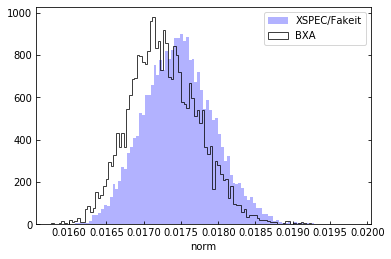

In [67]:
plt.hist(dfX.norm__4, bins=100, histtype='stepfilled', normed=True,
         color='blue', 
         alpha=0.3, 
         label='XSPEC/Fakeit')
plt.hist(dfB.norm__4, bins=100, histtype='step', normed=True,
         color='k', 
         alpha=0.75, 
         label='BXA')
plt.xlabel('norm')
plt.legend(loc='best', numpoints=1)
plt.show()

In [79]:
plt.clf()

In [86]:
dfX.describe()

,alpha__1,beta__2,tem__3,norm__4
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,-1.031312,-2.352329,539.475183,0.017471
std,0.019644,0.397062,49.762021,0.000468
min,-1.094609,-9.364046,363.270276,0.015917
25%,-1.044823,-2.414897,504.509587,0.017146
50%,-1.031458,-2.297880,536.657034,0.017463
75%,-1.018141,-2.207669,571.114782,0.017776
max,-0.939637,-1.951229,768.507248,0.019840


In [87]:
dfB.describe()

,alpha__1,beta__2,tem__3,norm__4
count,5102.000000,5102.000000,5102.000000,5102.000000
mean,-1.038401,-3.301397,565.790945,0.017276
std,0.020141,1.880711,55.185027,0.000467
min,-1.104266,-9.991857,398.282562,0.015759
25%,-1.051905,-3.011563,525.559071,0.016952
50%,-1.039074,-2.464543,564.009551,0.017251
75%,-1.024971,-2.296788,601.617296,0.017587
max,-0.964636,-2.015131,825.059532,0.019246


In [89]:
# 1-sigma are quantiles 
dfX.quantile(q = [.15865, .50, .84135], interpolation='linear')

,alpha__1,beta__2,tem__3,norm__4
0.15865,-1.051147,-2.485464,490.679170,0.016997
0.50000,-1.031458,-2.297880,536.657034,0.017463
0.84135,-1.011654,-2.172039,589.276751,0.017939


In [90]:
dfB.quantile(q = [.15865, .50, .84135], interpolation='linear')

,alpha__1,beta__2,tem__3,norm__4
0.15865,-1.058303,-4.733182,510.323855,0.016822
0.50000,-1.039074,-2.464543,564.009551,0.017251
0.84135,-1.018287,-2.246753,619.655438,0.017749


In [ ]:
dfX.quantile(q = [.15865, .50, .84135], interpolation='linear')

In [88]:
?dfX.describe

In [ ]:
include='meduan'
percentiles = [0.16]

In [98]:
dfX.describe(percentiles = [.15865, .50, .84135])

,alpha__1,beta__2,tem__3,norm__4
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,-1.031312,-2.352329,539.475183,0.017471
std,0.019644,0.397062,49.762021,0.000468
min,-1.094609,-9.364046,363.270276,0.015917
15.9%,-1.051147,-2.485464,490.679170,0.016997
50%,-1.031458,-2.297880,536.657034,0.017463
84.1%,-1.011654,-2.172039,589.276751,0.017939
max,-0.939637,-1.951229,768.507248,0.019840


In [99]:
dfB.describe(percentiles = [.15865, .50, .84135])

,alpha__1,beta__2,tem__3,norm__4
count,5102.000000,5102.000000,5102.000000,5102.000000
mean,-1.038401,-3.301397,565.790945,0.017276
std,0.020141,1.880711,55.185027,0.000467
min,-1.104266,-9.991857,398.282562,0.015759
15.9%,-1.058303,-4.733182,510.323855,0.016822
50%,-1.039074,-2.464543,564.009551,0.017251
84.1%,-1.018287,-2.246753,619.655438,0.017749
max,-0.964636,-2.015131,825.059532,0.019246


In [103]:
dfB.apply(np.median)

alpha__1     -1.039074
beta__2      -2.464543
tem__3      564.009551
norm__4       0.017251
dtype: float64

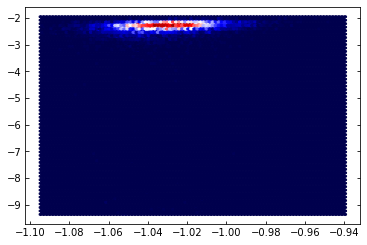

In [83]:
x = dfX.alpha__1
y = dfX.beta__2
plt.hexbin(x,y, cmap=plt.cm.seismic)

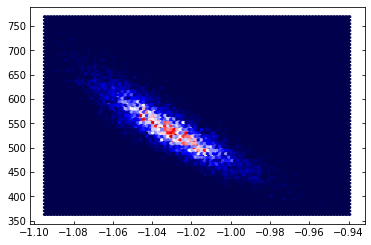

In [84]:
x = dfX.alpha__1
y = dfX.tem__3
plt.hexbin(x,y, cmap=plt.cm.seismic)

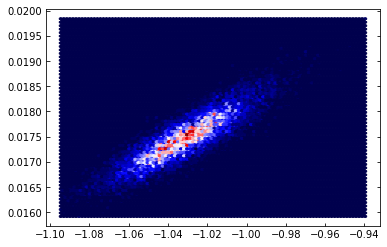

In [104]:
x = dfX.alpha__1
y = dfX.norm__4
plt.hexbin(x,y, cmap=plt.cm.seismic)

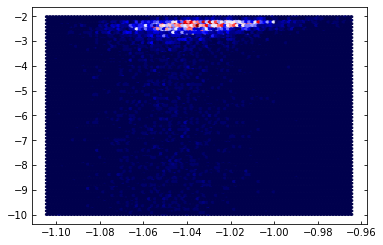

In [105]:
x = dfB.alpha__1
y = dfB.beta__2
plt.hexbin(x,y, cmap=plt.cm.seismic)

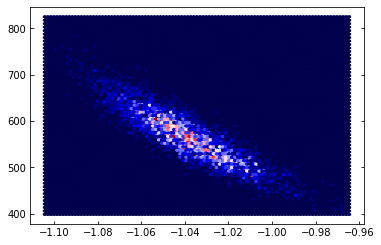

In [106]:
x = dfB.alpha__1
y = dfB.tem__3
plt.hexbin(x,y, cmap=plt.cm.seismic)

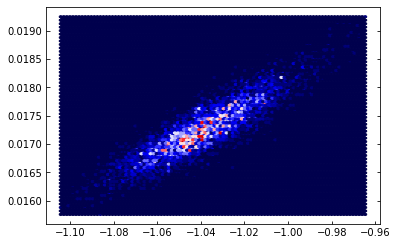

In [107]:
x = dfB.alpha__1
y = dfB.norm__4
plt.hexbin(x,y, cmap=plt.cm.seismic)